In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


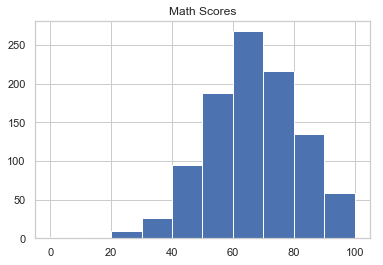

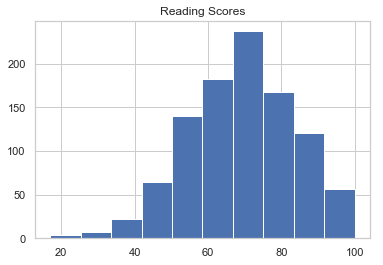

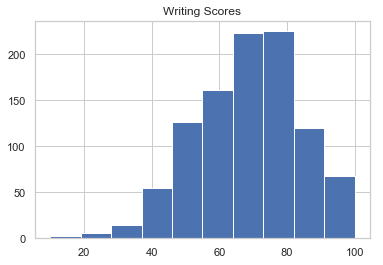

In [3]:
plt.hist(df['math score'])
plt.title('Math Scores')
plt.show()
plt.hist(df['reading score'])
plt.title('Reading Scores')
plt.show()
plt.hist(df['writing score'])
plt.title('Writing Scores')
plt.show()

In [4]:
print(stats.normaltest(df['math score']))
print(stats.normaltest(df['reading score']))
print(stats.normaltest(df['writing score']))

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)
NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)
NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)


In [10]:
#Using an alpha of 0.05, none of these distributions are normal.
from scipy.stats import boxcox

positive_math = []
for score in df['math score']:
    if score < 1:
        positive_math.append(1)
    else:
        positive_math.append(score)
df['positive math score'] = positive_math

math_boxcox,_ = boxcox(df['positive math score'])
reading_boxcox,_ = boxcox(df['reading score'])
writing_boxcox,_ = boxcox(df['writing score'])

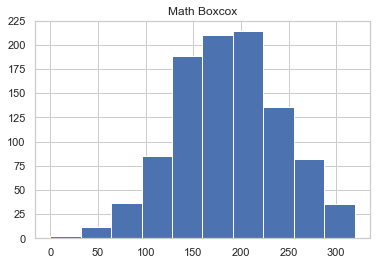

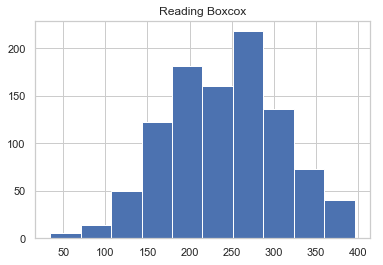

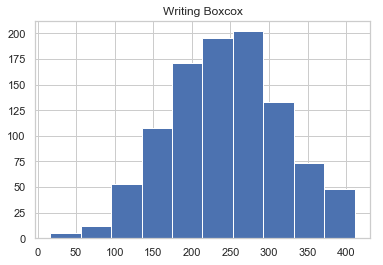

In [12]:
plt.hist(math_boxcox)
plt.title('Math Boxcox')
plt.show()
plt.hist(reading_boxcox)
plt.title('Reading Boxcox')
plt.show()
plt.hist(writing_boxcox)
plt.title('Writing Boxcox')
plt.show()

In [14]:
df['math boxcox'] = math_boxcox
df['reading boxcox'] = reading_boxcox
df['writing boxcox'] = writing_boxcox

print(stats.normaltest(df['math boxcox']))
print(stats.normaltest(df['reading boxcox']))
print(stats.normaltest(df['writing boxcox']))

NormaltestResult(statistic=0.9034198455639313, pvalue=0.636538788347859)
NormaltestResult(statistic=5.282274611852865, pvalue=0.07128015609575467)
NormaltestResult(statistic=6.267311355043339, pvalue=0.04355827085023795)


In [15]:
# Technically our writing boxcox is still not normal, but if we used an alpha of 0.01 it would be so it's close.
# The other two are now normally distributed though.

In [17]:
weighted_scores = []
for i in range(len(df)):
    weighted_scores.append((df['math score'][i] + df['reading score'][i] + df['writing score'][i])/3)
df['weighted score'] = weighted_scores

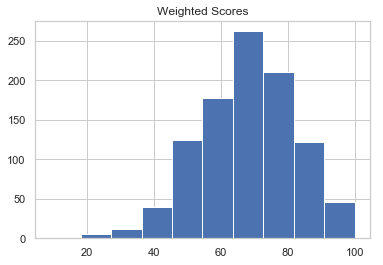

In [18]:
plt.hist(df['weighted score'])
plt.title('Weighted Scores')
plt.show()

In [19]:
stats.normaltest(df['weighted score'])

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)

In [20]:
boxcox_weighted,_ = stats.boxcox(df['weighted score'])
print(stats.normaltest(boxcox_weighted))

NormaltestResult(statistic=2.779857245981238, pvalue=0.2490930835165177)


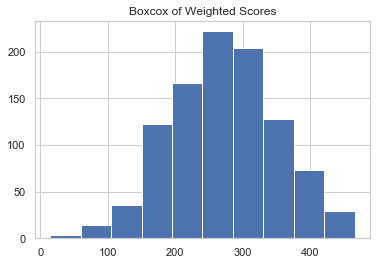

In [21]:
plt.hist(boxcox_weighted)
plt.title('Boxcox of Weighted Scores')
plt.show()

In [22]:
df['boxcox weighted score'] = boxcox_weighted

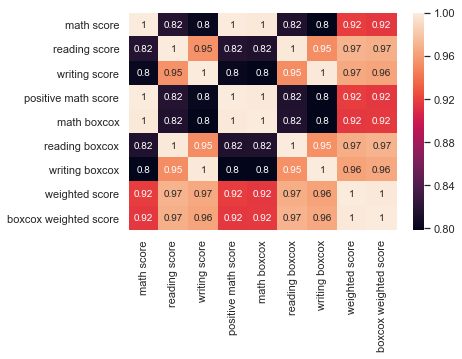

In [25]:
sns.heatmap(df.corr(), annot=True)
# This is not that useful. except to see that reading and writing scores are more correlated with our target than
# math, which is interesting

In [26]:
df.head(0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,positive math score,math boxcox,reading boxcox,writing boxcox,weighted score,boxcox weighted score


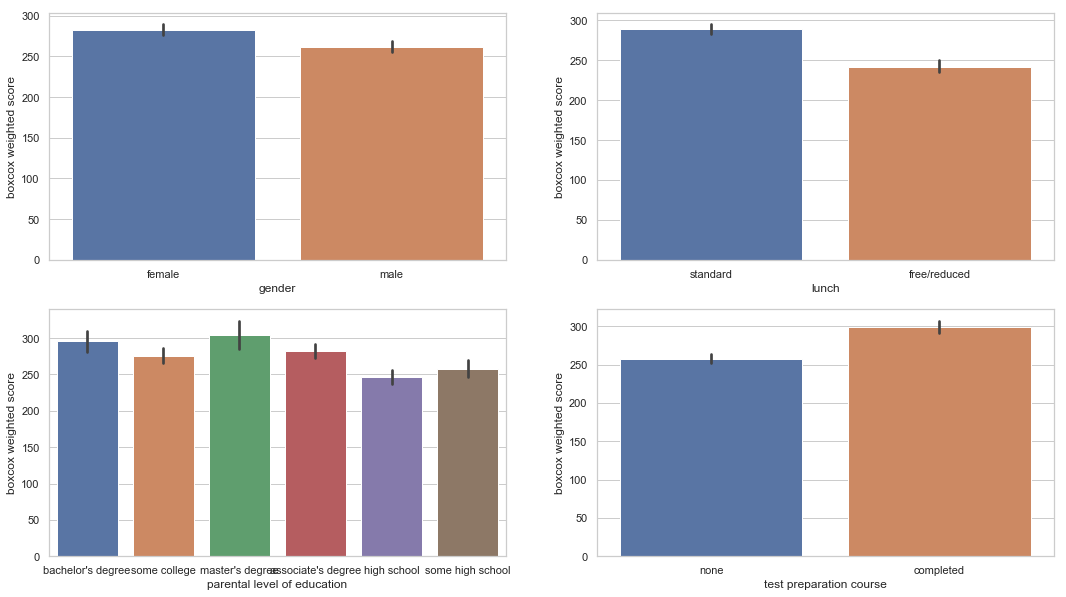

In [34]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.barplot(df['gender'], df['boxcox weighted score'],)

plt.subplot(2,2,2)
sns.barplot(df['lunch'], df['boxcox weighted score'],)

plt.subplot(2,2,3)
sns.barplot(df['parental level of education'], df['boxcox weighted score'],)

plt.subplot(2,2,4)
sns.barplot(df['test preparation course'], df['boxcox weighted score'],)